크롤링 중: 넷플릭스 ...
크롤링 중: 티빙 ...
크롤링 중: 디즈니 ...
크롤링 중: 박스오피스 ...

=== 넷플릭스 ===
1. 제목: 굿보이, 장르/방송일: 드라마 · 2025, 이미지 URL: https://file.kinolights.com/m/content_poster/202505/21/55f9a4fc-2d9f-4b15-9e73-256525487f4e.webp
2. 제목: 케이팝 데몬 헌터스, 장르/방송일: 영화 · 2025, 이미지 URL: 
3. 제목: 미지의 서울, 장르/방송일: 드라마 · 2025, 이미지 URL: https://file.kinolights.com/m/content_poster/202506/24/152bee9a-6601-48fc-8b33-af88af07cc5d.webp
4. 제목: 84제곱미터, 장르/방송일: 영화 · 2025, 이미지 URL: 
5. 제목: 모태솔로지만 연애는 하고 싶어, 장르/방송일: 예능 · 2025, 이미지 URL: https://file.kinolights.com/m/content_poster/202505/20/7c33aec0-b590-4f42-a8c6-9e329cffabee.webp
6. 제목: 오징어 게임 시즌 3, 장르/방송일: 드라마 · 2025, 이미지 URL: 
7. 제목: 진격의 거인 The Final Season 완결편 (전편), 장르/방송일: 애니메이션 · 2023, 이미지 URL: https://file.kinolights.com/m/content_poster/202507/10/e62e9882-7f66-4f7f-aecc-ab7c8f1dfd41.webp
8. 제목: 청담국제고등학교 2, 장르/방송일: 드라마 · 2025, 이미지 URL: 
9. 제목: 나 혼자만 레벨업, 장르/방송일: 애니메이션 · 2024, 이미지 URL: https://file.kinolights.com/m/content_poster/202506/24/4645e829-5f0d-49cc-8f97-e7c39d8
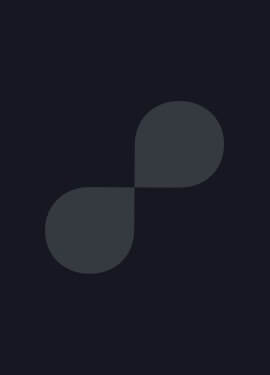
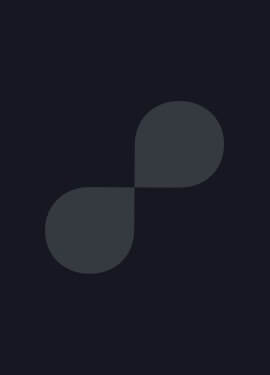
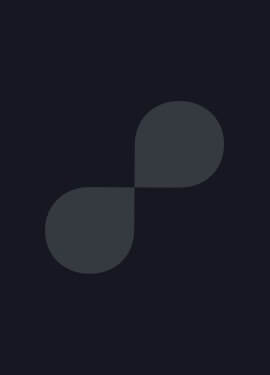
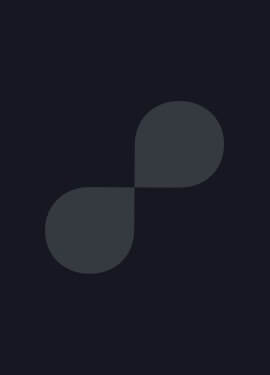
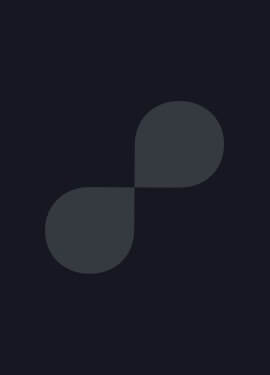
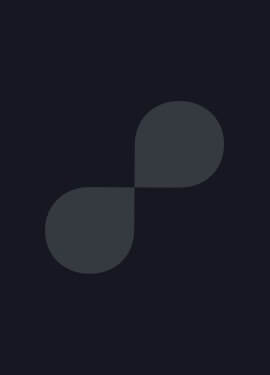
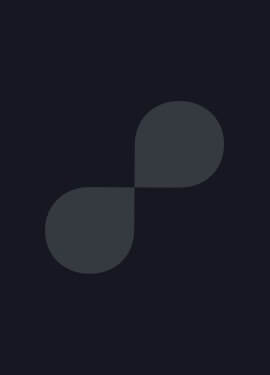
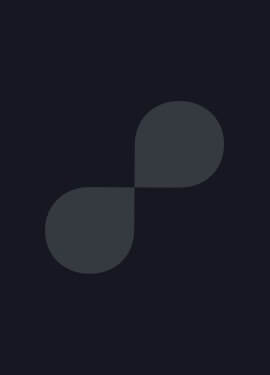
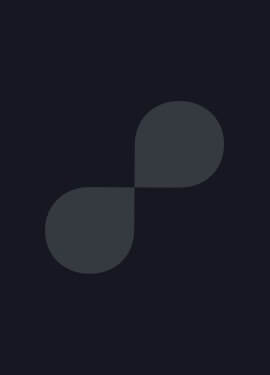
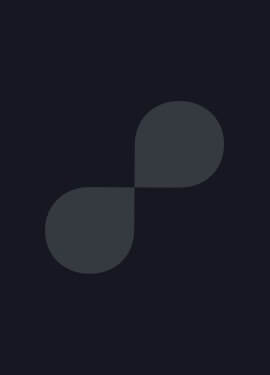
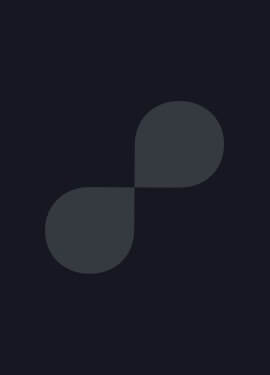
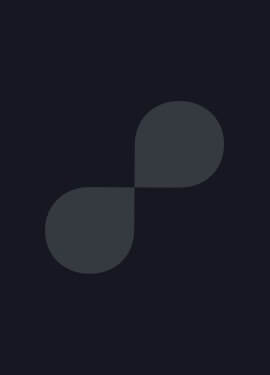
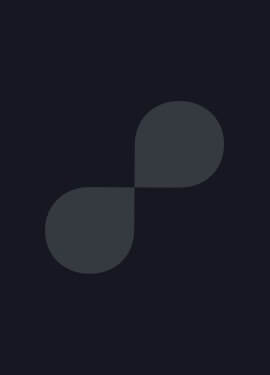
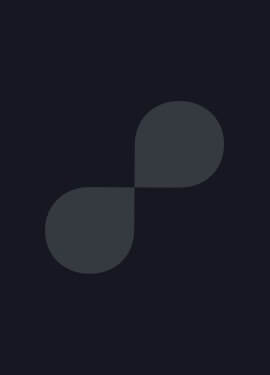
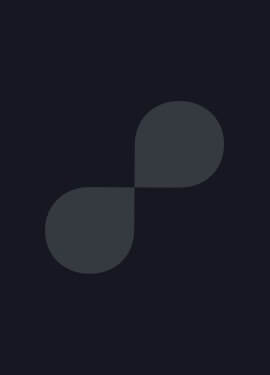
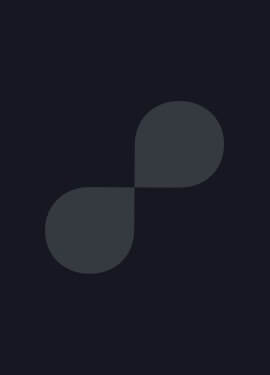
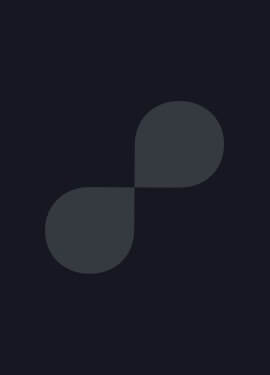
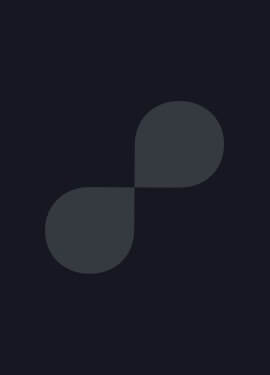
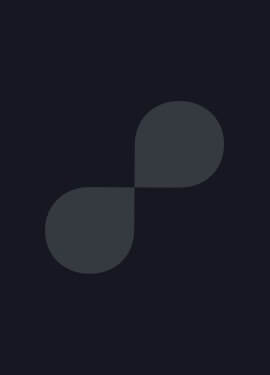
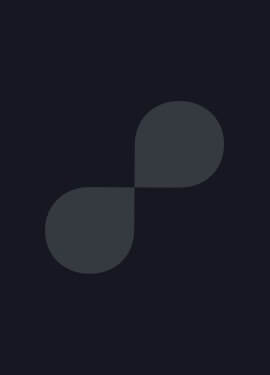

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

# [1. 크롬 옵션 설정]
options = Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36")
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# [2. URL 목록]
urls = {
    '넷플릭스': 'https://m.kinolights.com/ranking/netflix',
    '티빙': 'https://m.kinolights.com/ranking/tving',
    '디즈니': 'https://m.kinolights.com/ranking/disney',
    '박스오피스': 'https://m.kinolights.com/ranking/boxoffice'
}

# [3. 웹드라이버 실행]
driver = webdriver.Chrome(options=options)

# [4. 크롤링]
# 전체 데이터 딕셔너리
all_ranklists = {}

# 크롤링 작동 확인
for category, url in urls.items():
    print(f"크롤링 중: {category} ...")
    driver.get(url)
    time.sleep(3)  # 로딩 대기 (필요에 따라 조절)

    # [5. HTML 파싱]
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # [6. 데이터 추출 (TOP 10)]
    # rankNum = [num.get_text(strip=True) for num in soup.select('#contents .content-ranking-list .rank__number span')][:10]
    title = [t.get_text(strip=True) for t in soup.select('#contents .content-ranking-list .info__title span')][:10]
    type_ = [t.get_text(strip=True) for t in soup.select('#contents .content-ranking-list .info__subtitle span')][:10]
    poster_img = [img['src'] for img in soup.select('ul.content-ranking-list img.image-container__image') if img.has_attr('src')][:10]

    # [7. 합치기]
    ranklist = list(zip(title, type_, poster_img))
    # 각 카테고리 별로 딕셔너리 저장
    all_ranklists[category] = ranklist

driver.quit()

# 데이터 확인
for category, ranklist in all_ranklists.items():
    print(f"\n=== {category} ===")
    for idx, (title, type_, img) in enumerate(ranklist, 1):  # 1부터 번호 붙임
        print(f"{idx}. 제목: {title}, 장르/방송일: {type_}, 이미지 URL: {img}")
